## **Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import the Data
Let's extract our **Ecommerce Sales data** from the .csv file, create a  pandas DataFrame and look at the available indicators. The dataset contains order level sales information for an ecommerce platform. It includes the following columns:


- ***order_id***: Unique identifier for each order.
- ***product***: Name of the product sold (e.g., Watch, Bag, Shoes).
- ***category***: Product category (e.g., Electronics, Fashion).
- ***price***: Price of a single unit of the product.
- ***quantity***: Number of units purchased in the order.
- ***payment_method***: Payment method used (e.g., Easypaisa, Credit Card, JazzCash).
- ***date***: Date of the order.
- ***total***: Total order value (price × quantity).
- ***Month***: Month when the order was placed.
- ***Discount***: Discount applied to the order (if any).
- ***City Code***: Numeric code representing the city of the buyer: (1 = Karachi; 2 = Lahore; 3 = Islamabad; 4 =                                                                        Faisalabad; 5 = Quetta; 6 = Peshawar)
- ***Order Priority Code***: Numeric code representing order priority: (0 = LOW; 1 = MEDIUM; 2 = HIGH; 3 =                                                                                CRITICAL)
- ***Latitude***: Latitude of the buyer’s location.
- ***Longitude***: Longitude of the buyer’s location.

## ***Data Preprocessing and Wrangling***

#### 1. Load the dataset using Python Library Pandas. 

In [2]:
data = pd.read_csv('ecommerce_dataset.csv')
data.head()

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City Code,Order Priority Code,Latitude,Longtitude
0,1,Watch,Electronics,12652.30,4,Easypaisa,01/01/2023,50609.20,January,0.0,1.0,2.0,1.0,0.0
1,2,Bag,Fashion,20053.64,2,Credit Card,02/01/2023,40107.28,January,0.1,1.0,2.0,1.0,0.0
2,3,Shoes,Fashion,13274.17,2,JazzCash,03/01/2023,26548.34,January,0.1,1.0,2.0,1.0,0.0
3,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.1,1.0,2.0,1.0,0.0
4,5,Bag,Accessories,23165.07,1,Debit Card,05/01/2023,23165.07,January,0.0,1.0,NaN,1.0,0.0


In [3]:
data.shape

(506, 14)

#### 2. Check types of data.

In [4]:
data.dtypes

order_id                 int64
product                 object
category                object
price                  float64
quantity                 int64
payment_method          object
date                    object
total                  float64
Month                   object
Discount               float64
City Code              float64
Order Priority Code    float64
Latitude               float64
Longtitude             float64
dtype: object

#### 3. Drop irrelevant columns (Latitude, Longitude)

In [5]:
data.drop(['Latitude', 'Longtitude'], axis=1)

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City Code,Order Priority Code
0,1,Watch,Electronics,12652.30,4,Easypaisa,01/01/2023,50609.20,January,0.0,1.0,2.0
1,2,Bag,Fashion,20053.64,2,Credit Card,02/01/2023,40107.28,January,0.1,1.0,2.0
2,3,Shoes,Fashion,13274.17,2,JazzCash,03/01/2023,26548.34,January,0.1,1.0,2.0
3,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.1,1.0,2.0
4,5,Bag,Accessories,23165.07,1,Debit Card,05/01/2023,23165.07,January,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
501,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.1,1.0,2.0
502,18,Headphones,Electronics,14085.56,2,Debit Card,18/01/2023,28171.12,January,0.0,1.0,2.0
503,19,Laptop,Accessories,53657.14,4,Debit Card,19/01/2023,214628.56,January,0.1,1.0,2.0
504,20,Watch,Fashion,74385.39,4,Credit Card,20/01/2023,297541.56,January,0.0,1.0,2.0


#### 4. Rename columns City Code to City & Order Priority Code to Order Priority

In [6]:
data = data.rename(columns = {'City Code':'City' , 'Order Priority Code':'Order Priority'})

In [7]:
data.head()

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City,Order Priority,Latitude,Longtitude
0,1,Watch,Electronics,12652.30,4,Easypaisa,01/01/2023,50609.20,January,0.0,1.0,2.0,1.0,0.0
1,2,Bag,Fashion,20053.64,2,Credit Card,02/01/2023,40107.28,January,0.1,1.0,2.0,1.0,0.0
2,3,Shoes,Fashion,13274.17,2,JazzCash,03/01/2023,26548.34,January,0.1,1.0,2.0,1.0,0.0
3,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.1,1.0,2.0,1.0,0.0
4,5,Bag,Accessories,23165.07,1,Debit Card,05/01/2023,23165.07,January,0.0,1.0,NaN,1.0,0.0


#### 5. Check duplicate rows

In [8]:
data[data.duplicated()]

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City,Order Priority,Latitude,Longtitude
500,3,Shoes,Fashion,13274.17,2,JazzCash,03/01/2023,26548.34,January,0.1,1.0,2.0,1.0,0.0
501,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.1,1.0,2.0,1.0,0.0
502,18,Headphones,Electronics,14085.56,2,Debit Card,18/01/2023,28171.12,January,0.0,1.0,2.0,1.0,0.0
503,19,Laptop,Accessories,53657.14,4,Debit Card,19/01/2023,214628.56,January,0.1,1.0,2.0,1.0,0.0
504,20,Watch,Fashion,74385.39,4,Credit Card,20/01/2023,297541.56,January,0.0,1.0,2.0,1.0,0.0


#### 6. Drop duplicate records

In [9]:
data = data.drop_duplicates()

In [10]:
data.count()

order_id          501
product           501
category          501
price             501
quantity          501
payment_method    501
date              501
total             501
Month             501
Discount          501
City              486
Order Priority    482
Latitude          501
Longtitude        501
dtype: int64

#### 7. Check missing and null values

In [11]:
data.isnull().sum()

order_id           0
product            0
category           0
price              0
quantity           0
payment_method     0
date               0
total              0
Month              0
Discount           0
City              15
Order Priority    19
Latitude           0
Longtitude         0
dtype: int64

#### 8. Fill missing value by their median/mode

In [12]:
city_mode = data['City'].mode()[0]
data['City'] = data['City'].fillna(city_mode)

print(f"Mode value used for filling due to categorical data: {city_mode}\n")
print(f"Missing values in 'City' after filling: {data['City'].isnull().sum()}")

Mode value used for filling due to categorical data: 2.0

Missing values in 'City' after filling: 0


In [13]:
median = data['Order Priority'].median()
data['Order Priority'].fillna(median, inplace=True)

print(f"Median value used for filling due to numerical data: {median}\n")
print(f"Missing values in 'Order Priority' after filling: {data['Order Priority'].isnull().sum()}")

Median value used for filling due to numerical data: 2.0

Missing values in 'Order Priority' after filling: 0


## ***Exploratory Data Analysis (Key Observations)***

### ***1) Top 5 Best Selling Products***

In [14]:
data1 = data.groupby("product")["total"].sum().sort_values(ascending=False).head(5).round()
data1

product
Headphones    9414260.0
Watch         9295182.0
Mobile        8478520.0
Shoes         8304435.0
Bag           7978528.0
Name: total, dtype: float64

In [15]:
dataa = {
    'product': data1.index,
    'total': data1.values
}
data1 = pd.DataFrame(dataa)
data1

,product,total
0,Headphones,9414260.0
1,Watch,9295182.0
2,Mobile,8478520.0
3,Shoes,8304435.0
4,Bag,7978528.0


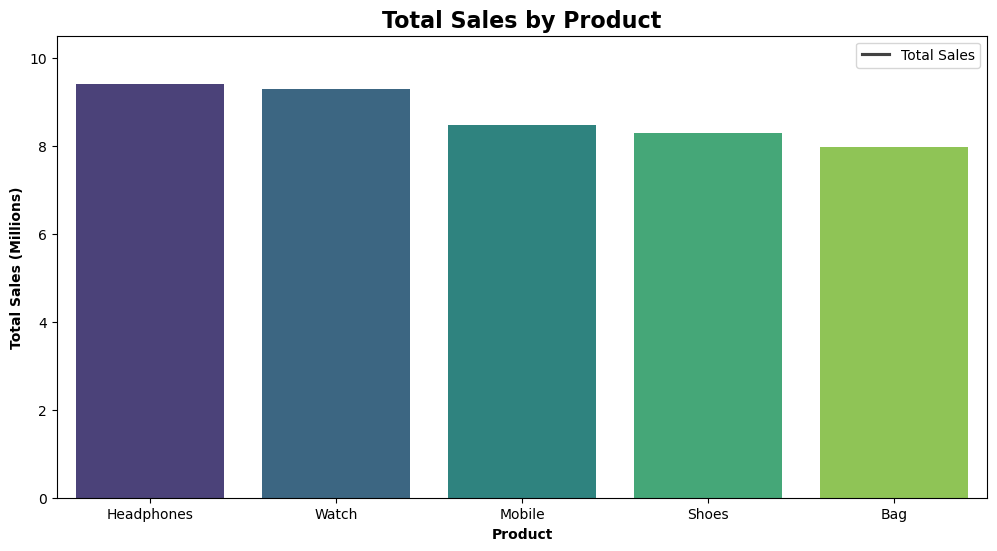

In [16]:
data1['total'] = (data1['total'] / 1000000).round(2)

plt.figure(figsize=(12, 6)) 
ax = sns.barplot(data=data1, x='product', y='total', palette='viridis')
ax.legend(['Total Sales'], loc='upper right')
plt.xlabel('Product', fontweight = 'bold')
plt.ylabel('Total Sales (Millions)', fontweight = 'bold')
plt.title('Total Sales by Product', fontsize=16, fontweight = 'bold')
plt.ylim(0, 10.5)
plt.show()

 **Headphones lead sales marginally over Watches, with all top 5 products showing strong and competitive performance.**

### ***2) Payment Method Distribution***

In [17]:
data2 = data.payment_method.value_counts()
data2

payment_method
JazzCash       112
Credit Card    107
Easypaisa      105
COD             98
Debit Card      79
Name: count, dtype: int64

In [18]:
data2.index.to_list()

['JazzCash', 'Credit Card', 'Easypaisa', 'COD', 'Debit Card']

In [19]:
values2 = data2.to_list()
values2

[112, 107, 105, 98, 79]

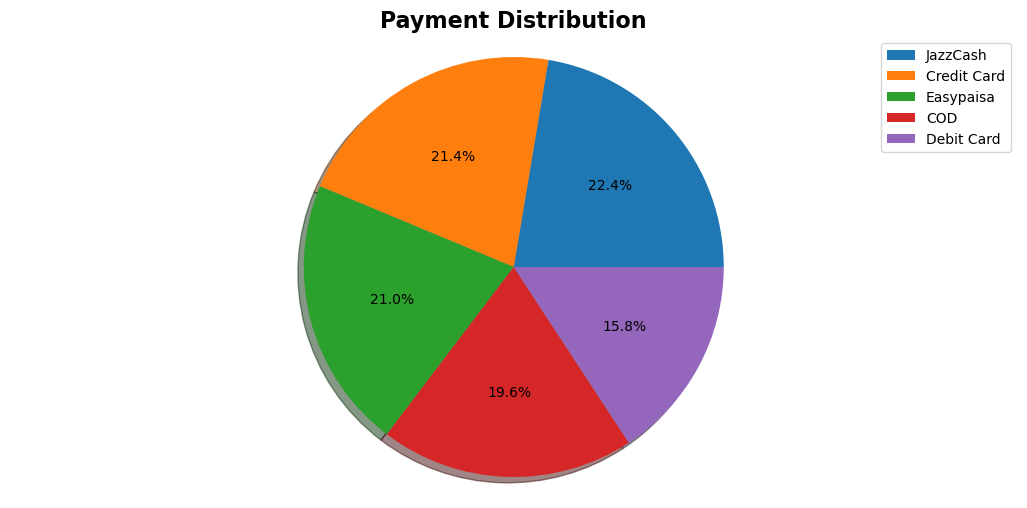

In [20]:
plt.figure(figsize = (13,6))
plt.pie(x = values2, labels = None, autopct = '%1.1f%%', shadow = True)
plt.legend(labels = data2.index, loc = 'upper right')
plt.axis('equal')
plt.title("Payment Distribution", fontsize = 16, fontweight = 'bold')
plt.show()

 **The popularity of mobile wallets like JazzCash and Easypaisa shows the market is ready for digital payments, while COD still serves an important segment of customers.**

### ***3) Monthwise Sales***

In [21]:
data3 = data.groupby("Month")["total"].sum().sort_index()
data3

Month
April        6275753.74
August       2557288.54
December     3952563.75
February     5545040.22
January      6417465.19
July         2688475.62
June         2860920.11
March        6711119.66
May          5909845.92
November     2805153.37
October      3139444.82
September    2515916.08
Name: total, dtype: float64

In [22]:
df = {
    'Month': data3.index,
    'total': data3.values
}
data3 = pd.DataFrame(df)
data3

,Month,total
0,April,6275753.74
1,August,2557288.54
2,December,3952563.75
3,February,5545040.22
4,January,6417465.19
5,July,2688475.62
6,June,2860920.11
7,March,6711119.66
8,May,5909845.92
9,November,2805153.37


In [23]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [24]:
data3['Month'] = pd.Categorical(data3['Month'], categories=month_order, ordered=True)

data3 = data3.sort_values('Month').reset_index(drop=True)
data3

,Month,total
0,January,6417465.19
1,February,5545040.22
2,March,6711119.66
3,April,6275753.74
4,May,5909845.92
5,June,2860920.11
6,July,2688475.62
7,August,2557288.54
8,September,2515916.08
9,October,3139444.82


In [25]:
data3['total'] = (data3['total'] / 1000000).round(2)

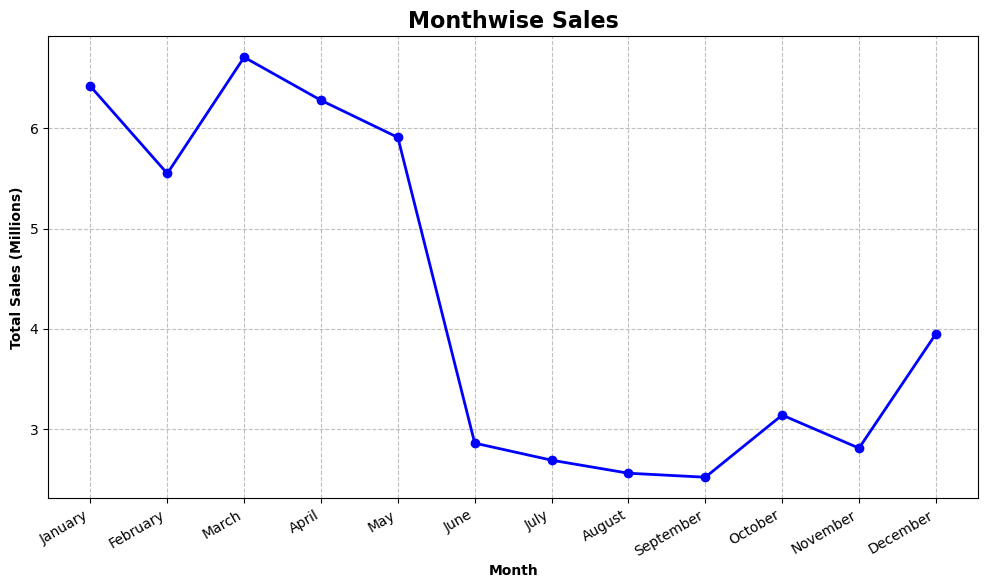

In [26]:
plt.figure(figsize=(12,6))
plt.plot(data3['Month'], data3['total'], marker="o", color="blue", linewidth=2)
plt.title("Monthwise Sales", fontsize = 16, fontweight = 'bold')
plt.xlabel("Month", fontweight = 'bold')
plt.ylabel("Total Sales (Millions)", fontweight = 'bold') 
plt.xticks(rotation=30, ha='right')
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

**Sales were strong in the first half (around 6M monthly) but dropped by half in the second half (around 3M monthly), showing a clear mid-year decline.**

**There might be seasonal factors or external events causing the mid-year drop - worth investigating what changed after May to address the sales decline.**

### ***4) City wise sales***

In [27]:
city_order = {1: 'Karachi', 2: 'Lahore', 3: 'Islamabad', 4: 'Faisalabad', 5: 'Quetta', 6: 'Peshawar'}

data['City'] = data['City'].map(city_order)

In [28]:
data4 = data.groupby('City')['total'].sum().sort_values(ascending=False)
data4

City
Lahore        16108573.11
Quetta         9488620.43
Islamabad      8028811.58
Faisalabad     6318998.97
Peshawar       6194016.19
Karachi        5239966.74
Name: total, dtype: float64

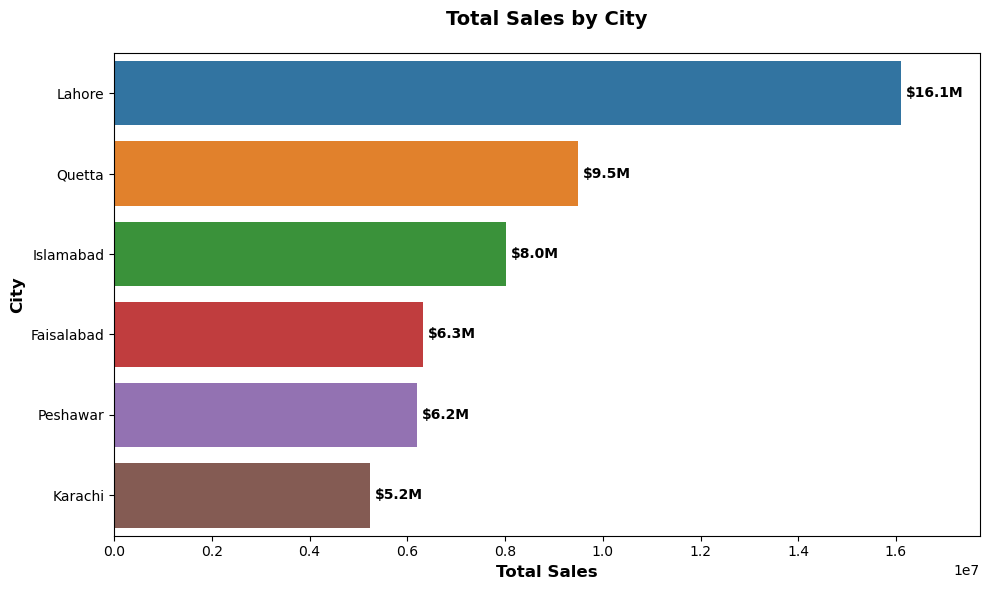

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=data4.values, y=data4.index, palette='tab10')
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 100000, p.get_y() + p.get_height()/2, 
             f'${width/1000000:.1f}M', 
             va='center', fontweight='bold', fontsize=10)
plt.title('Total Sales by City', fontweight='bold', fontsize=14, pad=20)
plt.xlabel('Total Sales', fontweight = 'bold', fontsize=12)
plt.ylabel('City', fontweight = 'bold', fontsize=12)
plt.xlim(0, data4.max() * 1.1)
plt.tight_layout()
plt.show()

**Lahore dominates with over 16M in sales. Surprisingly, Karachi, despite being the largest city, has the lowest sales at just 5.2M.** **Karachi is significantly underperforming relative to its market size - this gap represents a major opportunity for growth in Karachi.**

### ***5) Monthly Sales by Category***

In [30]:
data5 = data.groupby(["Month", "category"])["total"].sum().unstack()
data5

category,Accessories,Electronics,Fashion
Month,,,
April,2387980.38,2265079.20,1622694.16
August,521529.94,881950.11,1153808.49
December,1005459.07,1460885.05,1486219.63
February,1178881.69,1929360.80,2436797.73
January,2745729.82,2034089.75,1637645.62
July,961408.72,1218489.97,508576.93
June,1421673.13,657353.10,781893.88
March,2749630.71,2457415.74,1504073.21
May,1240740.21,2352232.89,2316872.82


In [31]:
for column in data5.columns:
    data5[column] = (data5[column] / 1000000).round(2)

In [32]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [33]:
data5 = data5.reindex(month_order)
data5

category,Accessories,Electronics,Fashion
Month,,,
January,2.75,2.03,1.64
February,1.18,1.93,2.44
March,2.75,2.46,1.50
April,2.39,2.27,1.62
May,1.24,2.35,2.32
June,1.42,0.66,0.78
July,0.96,1.22,0.51
August,0.52,0.88,1.15
September,0.85,0.95,0.71


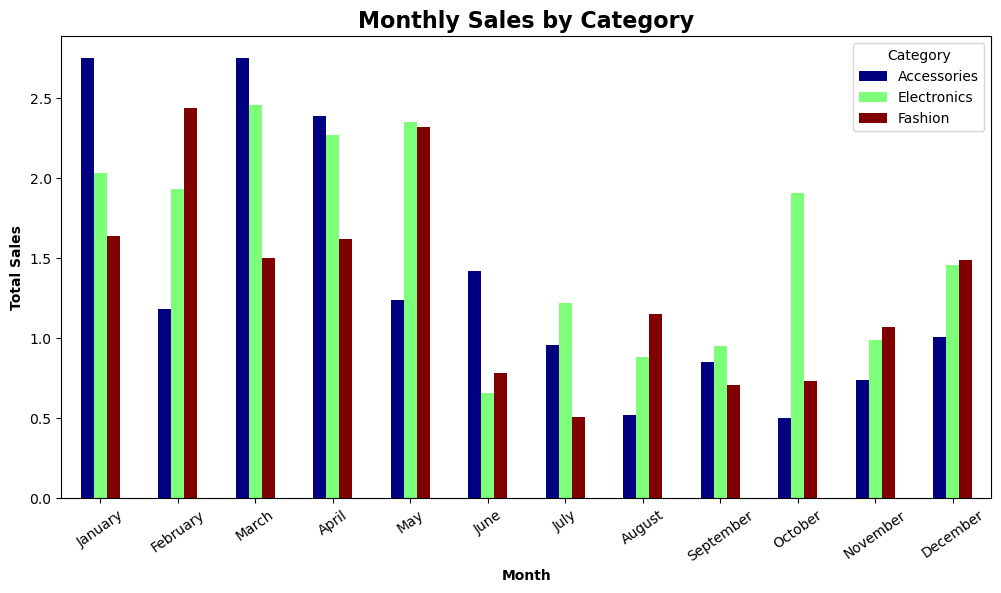

In [34]:
data5.plot(kind="bar", figsize=(12,6), colormap='jet')
plt.title("Monthly Sales by Category", fontsize = 16, fontweight = 'bold')
plt.xlabel("Month", fontweight = 'bold')
plt.ylabel("Total Sales", fontweight = 'bold')
plt.xticks(rotation=35)
plt.legend(title="Category")
plt.show()

**Due to data quality issues, such as products being incorrectly categorized (e.g., Bags listed under Electronics), a category-wise breakdown would be misleading. Therefore, we will apply the same observation from the month-wise sales analysis here.**

## ***Conclusion***

**The analysis reveals a critical data integrity issue: all six main products (Watch, Bag, Shoes, Laptop, Headphones, Mobile) appear across all three categories (Electronics, Fashion, Accessories). This inconsistent categorization such as Bags listed under Electronics makes the dataset highly unreliable for any category-specific analysis.**

**Apart from that, focus on promoting top-selling products (Headphones and Watches), as they are driving the highest revenue. The mid-year drop since June should be investigated, and promotions should be launched during those months. A boost in marketing is required in Karachi, as it is underperforming despite its market size. Mobile wallets should be supported more, as they are the customers favorite mode of transaction.**